In [1]:
import pandas as pd    #library for data manipulation and analysis
import matplotlib.pyplot as plt
from datetime import datetime    #library to work with time data

In [2]:
#loading the CSV file and peek what is inside the Pandora's Box
df = pd.read_csv("CleanedDataInNoteBook.csv") 
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223409 entries, 0 to 223408
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     223409 non-null  int64 
 1   _id            223409 non-null  int64 
 2   time           223409 non-null  object
 3   cno            223409 non-null  int64 
 4   in             223409 non-null  int64 
 5   out            223409 non-null  int64 
 6   date           223409 non-null  int64 
 7   hours          223409 non-null  int64 
 8   date_timedata  223409 non-null  object
dtypes: int64(7), object(2)
memory usage: 15.3+ MB


,Unnamed: 0,_id,time,cno,in,out,date,hours,date_timedata
0,98864,98865,2015-07-06T23:00:00,3,1,4,20150706,230000,2015-07-06
1,102321,102322,2015-07-06T20:00:00,6,0,4,20150706,200000,2015-07-06
2,102322,102323,2015-07-06T22:00:00,6,0,8,20150706,220000,2015-07-06
3,102318,102319,2015-07-06T17:00:00,6,149,166,20150706,170000,2015-07-06
4,102317,102318,2015-07-06T16:00:00,6,142,211,20150706,160000,2015-07-06


In [3]:
#convert date from string into datatime(a data type in panda) 
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
#check if I fuck up or not 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223409 entries, 0 to 223408
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     223409 non-null  int64         
 1   _id            223409 non-null  int64         
 2   time           223409 non-null  object        
 3   cno            223409 non-null  int64         
 4   in             223409 non-null  int64         
 5   out            223409 non-null  int64         
 6   date           223409 non-null  datetime64[ns]
 7   hours          223409 non-null  int64         
 8   date_timedata  223409 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 15.3+ MB


In [4]:
#grouping the data base on date
df=df.groupby(['date']).sum().reset_index()

In [5]:
#prepare the data for graph
showdf=df[['date','in','out']]


In [8]:
#do some filter because the data is to many to show in one graph
start_date = "2017-1-1"
end_date = "2017-12-31"

after_start_date = showdf["date"] >= start_date
before_end_date = showdf["date"] <= end_date
between_two_dates = after_start_date & before_end_date
showdf = df.loc[between_two_dates]

In [9]:
#check if I fuck up or not
print(showdf)

          date  Unnamed: 0       _id  cno    in   out     hours
544 2017-01-01     6666492   6666660  672     7     7  19320000
545 2017-01-02     6694716   6694884  672  3986  3991  19320000
546 2017-01-03     6722940   6723108  672  3563  3567  19320000
547 2017-01-04     6751164   6751332  672  3626  3607  19320000
548 2017-01-05     6779388   6779556  672  3932  3901  19320000
..         ...         ...       ...  ...   ...   ...       ...
904 2017-12-27    22366428  22366596  672  3585  3533  19320000
905 2017-12-28    22394652  22394820  672  4322  4257  19320000
906 2017-12-29    22422876  22423044  672  4262  4180  19320000
907 2017-12-30    22451100  22451268  672  2049  2056  19320000
908 2017-12-31    22479324  22479492  672    77   108  19320000

[365 rows x 7 columns]


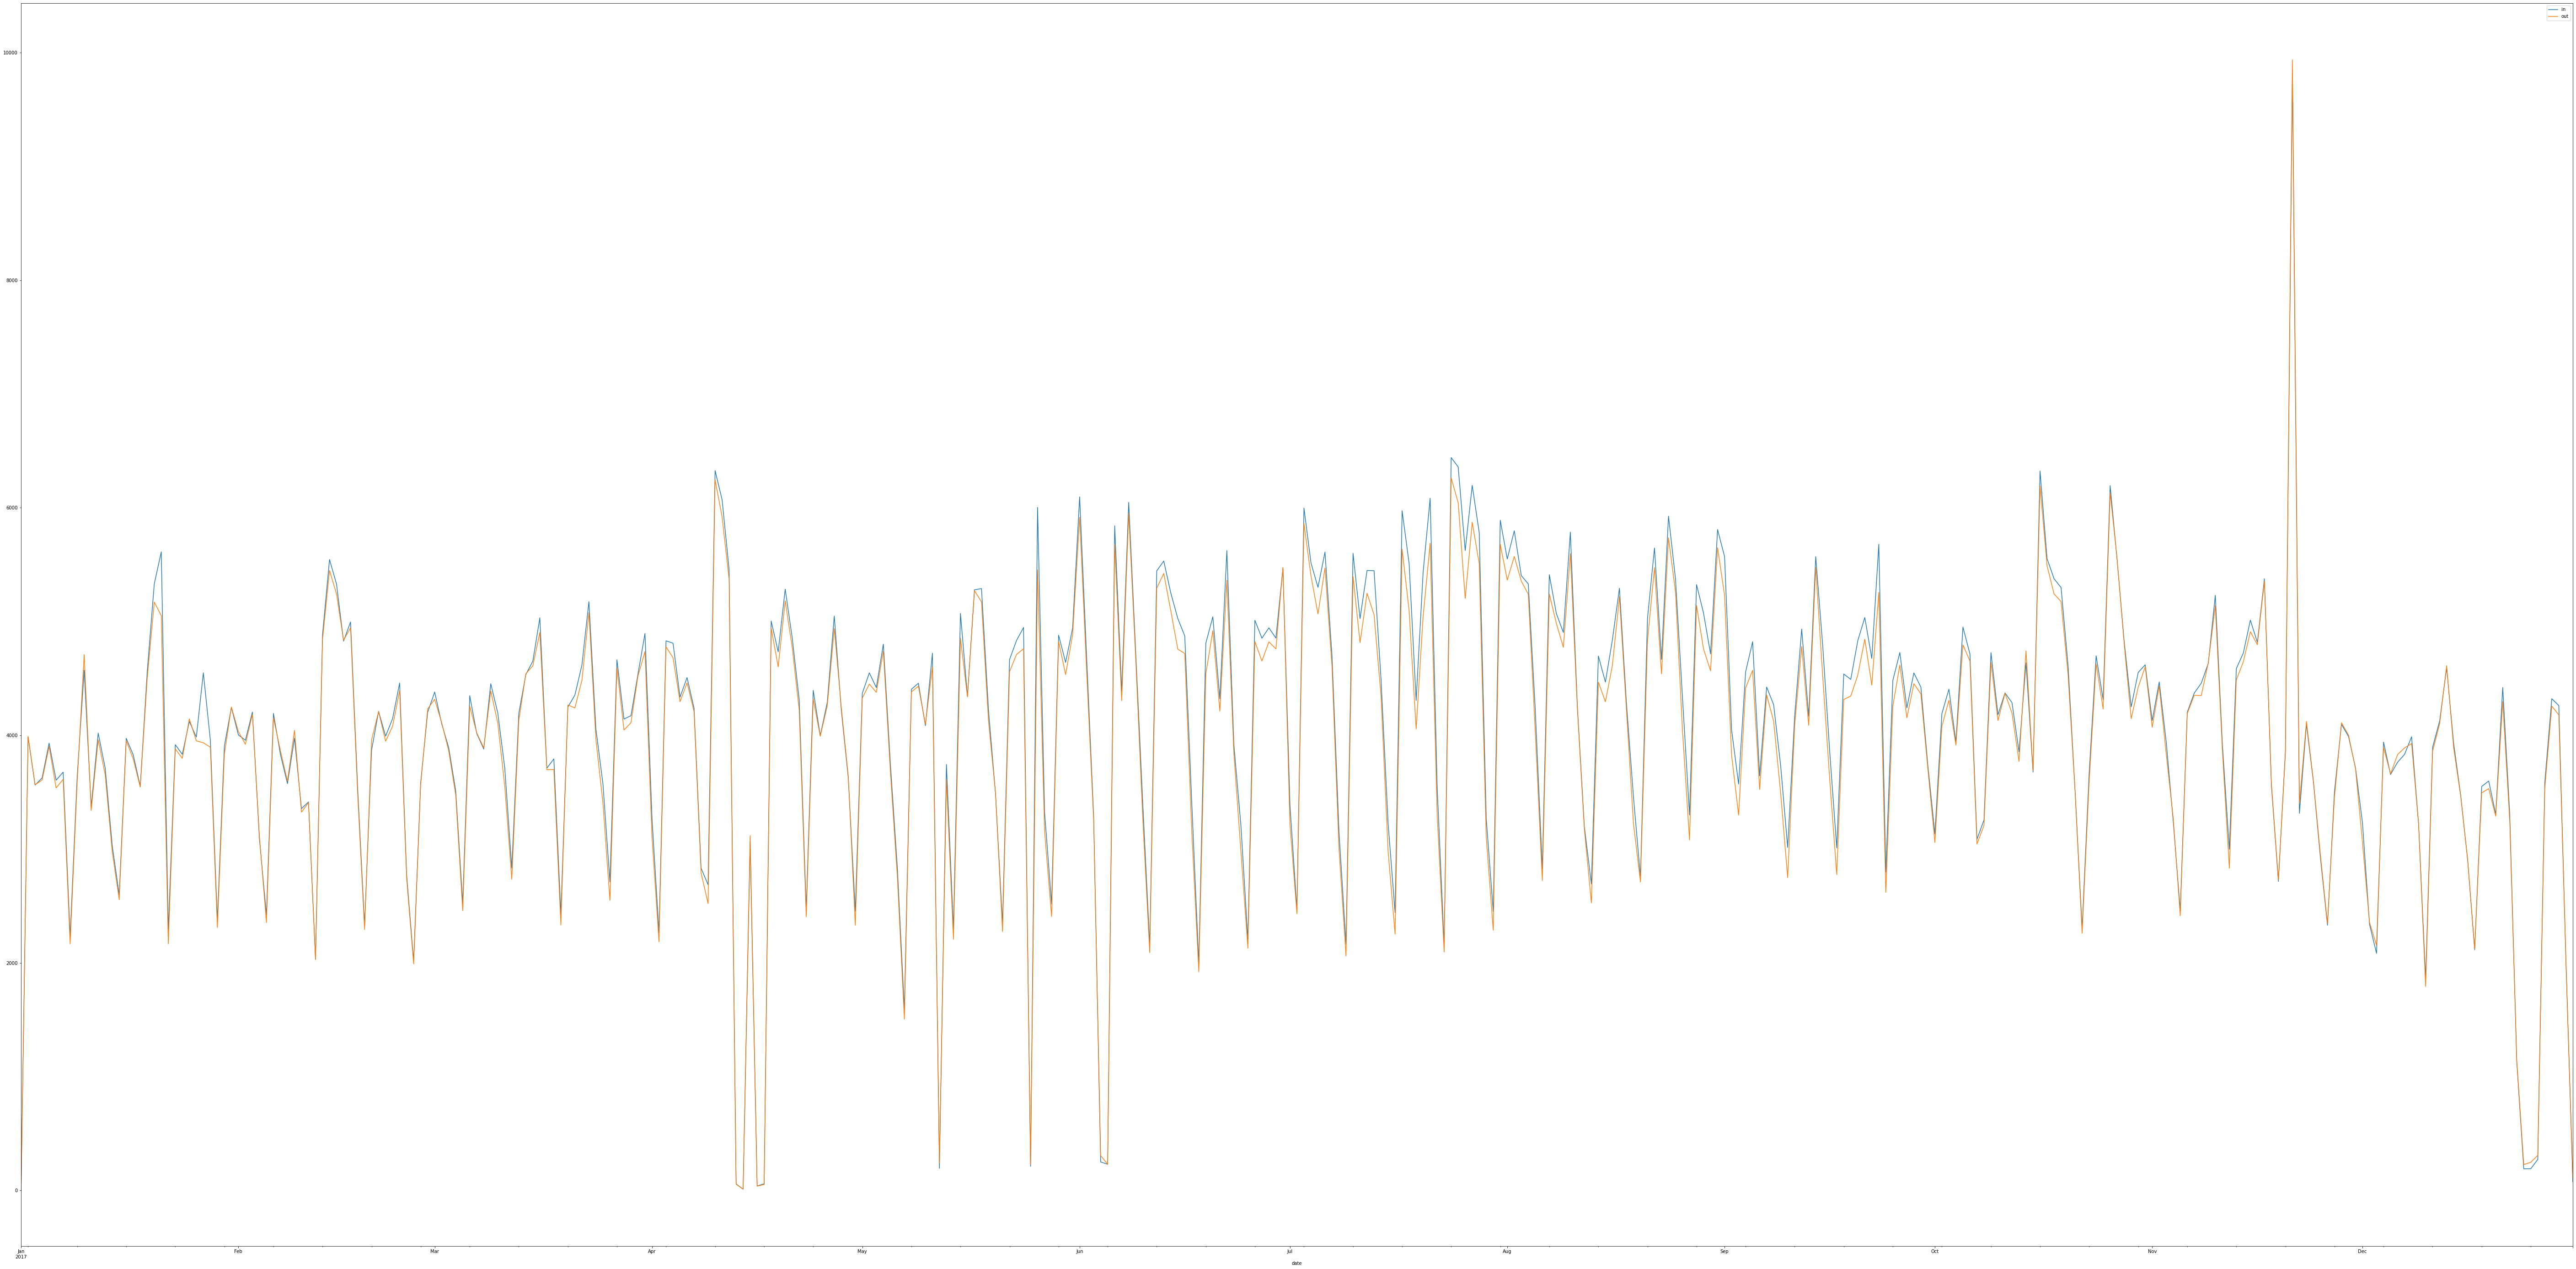

In [21]:
#plz work, just show me the graph
showdf.plot.line(x="date", y=["in", "out"],figsize=(100,50))
plt.show()